In [1]:
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
filename = "../../20200404_LWB_Client_Events_Month.csv"

In [3]:
fullData = pd.read_csv(filename)
#data = pd.read_csv(filename, nrows=1000)

/Users/chenqinzhang/opt/anaconda3/envs/sem1_2020/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (849,856,934,935,936,938,939,940,941,942,943,944,945,947,948,949,951,952,953,975,976,978,1008,1014,1029) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
fullData.shape
fullData.head(5)

(124293, 1181)

,_key_client_id,_key_occurreddate_month,occurreddate_monthofyear,incident_catgry__piv,incident_catgry_offences_significant_sa_jurisdiction_cate_piv,incident_catgry_client_missing_piv,incident_catgry_offences_minor_niss_jurisdiction_category_piv,incident_catgry_offences_minor_vic_jurisdiction_category_piv,incident_catgry_offences_minor_client_missing_piv,incident_catgry_offences_significant_offences_minor_piv,...,rowtype_program_primary_service_type_start_piv_lag03,rowtype_program_primary_service_type_start_piv_lag04,rowtype_program_primary_service_type_start_piv_lag05,rowtype_program_primary_service_type_start_piv_lag06,rowtype_client_alert_start_piv_lag01,rowtype_client_alert_start_piv_lag02,rowtype_client_alert_start_piv_lag03,rowtype_client_alert_start_piv_lag04,rowtype_client_alert_start_piv_lag05,rowtype_client_alert_start_piv_lag06
0,0000D172-EA88-432F-8235-9FAA00D29072,2019-04-01T00:00:00.0,4,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000D172-EA88-432F-8235-9FAA00D29072,2019-05-01T00:00:00.0,5,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,0000D172-EA88-432F-8235-9FAA00D29072,2019-06-01T00:00:00.0,6,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,0000D172-EA88-432F-8235-9FAA00D29072,2019-07-01T00:00:00.0,7,0,0,0,0,0,0,0,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
4,0000D172-EA88-432F-8235-9FAA00D29072,2019-08-01T00:00:00.0,8,0,0,0,0,0,0,0,...,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN


In [5]:
fullData.tail(5)

,_key_client_id,_key_occurreddate_month,occurreddate_monthofyear,incident_catgry__piv,incident_catgry_offences_significant_sa_jurisdiction_cate_piv,incident_catgry_client_missing_piv,incident_catgry_offences_minor_niss_jurisdiction_category_piv,incident_catgry_offences_minor_vic_jurisdiction_category_piv,incident_catgry_offences_minor_client_missing_piv,incident_catgry_offences_significant_offences_minor_piv,...,rowtype_program_primary_service_type_start_piv_lag03,rowtype_program_primary_service_type_start_piv_lag04,rowtype_program_primary_service_type_start_piv_lag05,rowtype_program_primary_service_type_start_piv_lag06,rowtype_client_alert_start_piv_lag01,rowtype_client_alert_start_piv_lag02,rowtype_client_alert_start_piv_lag03,rowtype_client_alert_start_piv_lag04,rowtype_client_alert_start_piv_lag05,rowtype_client_alert_start_piv_lag06
124288,FFFF7C4D-F6DD-46D0-A9C0-AE3C2DC51132,2019-09-01T00:00:00.0,9,0,0,0,0,0,0,0,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN
124289,FFFF7C4D-F6DD-46D0-A9C0-AE3C2DC51132,2019-10-01T00:00:00.0,10,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
124290,FFFF7C4D-F6DD-46D0-A9C0-AE3C2DC51132,2019-11-01T00:00:00.0,11,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
124291,FFFF7C4D-F6DD-46D0-A9C0-AE3C2DC51132,2019-12-01T00:00:00.0,12,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
124292,FFFF7C4D-F6DD-46D0-A9C0-AE3C2DC51132,2020-01-01T00:00:00.0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
print(len(fullData._key_client_id.unique()))
client_index = fullData.filter(regex=r'_key_client_id', axis=1)
time_index = fullData.filter(regex=r'_key_occurreddate_month', axis=1)
time_index = time_index.astype("datetime64[ns]")
#client_index
#time_index

14387


## Data analysis for month data of categories prgcontct, progsubjcat and client status

In [7]:
pd.options.display.max_seq_items = 2000
#data = fullData[fullData.columns[238:478]]
prgcontct = fullData.filter(regex=r'^prgcontct_', axis=1)
progsubjcat = fullData.filter(regex=r'^progsubjcat_', axis=1)
client = fullData.filter(regex=r'^client_', axis=1)
data = pd.concat([client_index, time_index, prgcontct,progsubjcat, client],axis=1)
data = data.set_index(["_key_client_id", "_key_occurreddate_month"])

data.columns

Index(['prgcontct_meeting_group_of_people_piv',
       'prgcontct_other_organisation_piv',
       'prgcontct_meeting_lwb_internal_only_piv',
       'prgcontct_educational_institution_piv', 'prgcontct_employer_piv',
       'prgcontct_lwb_worker_piv', 'prgcontct_police_piv',
       'prgcontct_both_client_and_carer_piv',
       'prgcontct_health_professional_piv', 'prgcontct_department_piv',
       'prgcontct_other_stakeholder_piv', 'prgcontct_family_piv',
       'prgcontct_carer_piv', 'prgcontct_client_piv',
       'prgcontct_meeting_group_of_people_piv_sum_n_days',
       'prgcontct_other_organisation_piv_sum_n_days',
       'prgcontct_meeting_lwb_internal_only_piv_sum_n_days',
       'prgcontct_educational_institution_piv_sum_n_days',
       'prgcontct_employer_piv_sum_n_days',
       'prgcontct_lwb_worker_piv_sum_n_days',
       'prgcontct_police_piv_sum_n_days',
       'prgcontct_both_client_and_carer_piv_sum_n_days',
       'prgcontct_health_professional_piv_sum_n_days',
       'prg

In [13]:
prgColumn = prgcontct.filter(regex=r'_piv$', axis=1)
len(prgColumn.columns)
progsubjcatColumn = progsubjcat.filter(regex=r'_piv$', axis=1)
len(progsubjcatColumn.columns)
len(client.columns)

len(prgcontct.columns)
len(progsubjcat.columns)

14

38

12

56

152

In [8]:
#len(data[data['rowtype_progress_note_piv_sum_n_days']>0]['rowtype_progress_note_piv_sum_n_days'])
print(len(data.columns))
data.head(3)

220


prgcontct_meeting_group_of_people_piv  \
_key_client_id                       _key_occurreddate_month                                          
0000D172-EA88-432F-8235-9FAA00D29072 2019-04-01                                                   0   
                                     2019-05-01                                                   0   
                                     2019-06-01                                                   0   

                                                              prgcontct_other_organisation_piv  \
_key_client_id                       _key_occurreddate_month                                     
0000D172-EA88-432F-8235-9FAA00D29072 2019-04-01                                              0   
                                     2019-05-01                                              0   
                                     2019-06-01                                              0   

                                                              prgcontct_meeting_lwb_internal_only_piv  \
_key_client_id                       _key_occurreddate_month                                            
0000D172-EA88-432F-8235-9FAA00D29072 2019-04-01                                                     0   
                                     2019-05-01                                                     0   
                                     2019-06-01                                                     0   

                                                              prgcontct_educational_institution_piv  \
_key_client_id                       _key_occurreddate_month                                          
0000D172-EA88-432F-8235-9FAA00D29072 2019-04-01                                                   0   
                                     2019-05-01                                                   0   
                                     2019-06-01                                                   0   

                                                              prgcontct_employer_piv  \
_key_client_id                       _key_occurreddate_month                           
0000D172-EA88-432F-8235-9FAA00D29072 2019-04-01                                    0   
                                     2019-05-01                                    0   
                                     2019-06-01                                    0   

                                                              prgcontct_lwb_worker_piv  \
_key_client_id                       _key_occurreddate_month                             
0000D172-EA88-432F-8235-9FAA00D29072 2019-04-01                                      0   
                                     2019-05-01                                      0   
                                     2019-06-01                                      0   

                                                              prgcontct_police_piv  \
_key_client_id                       _key_occurreddate_month                         
0000D172-EA88-432F-8235-9FAA00D29072 2019-04-01                                  0   
                                     2019-05-01                                  0   
                                     2019-06-01                                  0   

                                                              prgcontct_both_client_and_carer_piv  \
_key_client_id                       _key_occurreddate_month                                        
0000D172-EA88-432F-8235-9FAA00D29072 2019-04-01                                                 0   
                                     2019-05-01                                                 0   
                                     2019-06-01                                                 0   

                                                              prgcontct_health_professional_piv  \
_key_client_id                       _key_occurreddate_month                         

In [9]:
len(data.groupby(level=0))
data.loc["0000D172-EA88-432F-8235-9FAA00D29072"]
data.iloc[20]
data.head(5)

14387

,prgcontct_meeting_group_of_people_piv,prgcontct_other_organisation_piv,prgcontct_meeting_lwb_internal_only_piv,prgcontct_educational_institution_piv,prgcontct_employer_piv,prgcontct_lwb_worker_piv,prgcontct_police_piv,prgcontct_both_client_and_carer_piv,prgcontct_health_professional_piv,prgcontct_department_piv,...,client_status_deactivated_in_jail_piv,client_status_precontact_piv,client_status_deactivating_piv,client_status_active_piv,client_status_preactivation_piv,client_status_activating_piv,client_status_deactivated_change_of_circumstance_piv,client_status_deactivated_other_piv,client_status_deactivated_in_hospital_piv,client_status_first_contact_piv
_key_occurreddate_month,,,,,,,,,,,,,,,,,,,,,
2019-04-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,28,0,0,0,0,0,0
2019-05-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,31,0,0,0,0,0,0
2019-06-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,30,0,0,0,0,0,0
2019-07-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,31,0,0,0,0,0,0
2019-08-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,31,0,0,0,0,0,0
2019-09-01,0,0,0,0,0,0,0,2,0,0,...,0,0,0,30,0,0,0,0,0,0
2019-10-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,31,0,0,0,0,0,0
2019-11-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,30,0,0,0,0,0,0
2019-12-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,31,0,0,0,0,0,0


prgcontct_meeting_group_of_people_piv                   0.0
prgcontct_other_organisation_piv                        0.0
prgcontct_meeting_lwb_internal_only_piv                 0.0
prgcontct_educational_institution_piv                   0.0
prgcontct_employer_piv                                  0.0
                                                       ... 
client_status_activating_piv                            0.0
client_status_deactivated_change_of_circumstance_piv    0.0
client_status_deactivated_other_piv                     0.0
client_status_deactivated_in_hospital_piv               0.0
client_status_first_contact_piv                         0.0
Name: (000377E7-E2BE-E011-B4AF-B6A03279A8B3, 2019-09-01 00:00:00), Length: 220, dtype: float64

prgcontct_meeting_group_of_people_piv  \
_key_client_id                       _key_occurreddate_month                                          
0000D172-EA88-432F-8235-9FAA00D29072 2019-04-01                                                   0   
                                     2019-05-01                                                   0   
                                     2019-06-01                                                   0   
                                     2019-07-01                                                   0   
                                     2019-08-01                                                   0   

                                                              prgcontct_other_organisation_piv  \
_key_client_id                       _key_occurreddate_month                                     
0000D172-EA88-432F-8235-9FAA00D29072 2019-04-01                                              0   
                                     2019-05-01                                              0   
                                     2019-06-01                                              0   
                                     2019-07-01                                              0   
                                     2019-08-01                                              0   

                                                              prgcontct_meeting_lwb_internal_only_piv  \
_key_client_id                       _key_occurreddate_month                                            
0000D172-EA88-432F-8235-9FAA00D29072 2019-04-01                                                     0   
                                     2019-05-01                                                     0   
                                     2019-06-01                                                     0   
                                     2019-07-01                                                     0   
                                     2019-08-01                                                     0   

                                                              prgcontct_educational_institution_piv  \
_key_client_id                       _key_occurreddate_month                                          
0000D172-EA88-432F-8235-9FAA00D29072 2019-04-01                                                   0   
                                     2019-05-01                                                   0   
                                     2019-06-01                                                   0   
                                     2019-07-01                                                   0   
                                     2019-08-01                                                   0   

                                                              prgcontct_employer_piv  \
_key_client_id                       _key_occurreddate_month                           
0000D172-EA88-432F-8235-9FAA00D29072 2019-04-01                                    0   
                                     2019-05-01                                    0   
                                     2019-06-01                                    0   
                                     2019-07-01                                    0   
                                     2019-08-01                                    0   

                                                              prgcontct_lwb_worker_piv  \
_key_client_id                       _key_occurreddate_month                             
0000D172-EA88-432F-8235-9FAA00D29072 2019-04-01                                      0   
                                     2019-05-01                                      0   
                                     2019-06-01                                      0   
                                     2019-07-01                                      0   
                                     2

### Data cleaning

(1). Find columns that do not have any values. <br/>
(2). Find columns that only 1% have values. <br/>
(3). Find columns that only 2% have values. <br/>
(4). Find columns that only 5% have values. <br/>

In [10]:
def columns_low_values_occupation(threshold, data):
    targetColumn = []
    for i in data.columns:
        if len(data[data[i]!=0])/len(data[i]) <= threshold:
            targetColumn.append(i)
    return targetColumn

def print_num(threshold, targetColumn):
    print("The numbers of columns that values only occupied "+ str(threshold) + " of columns: "+ str(len(targetColumn)))


In [11]:
tc0 = columns_low_values_occupation(0, data)
print("The number of columns that have no values at all: "+ str(len(tc0)))

The number of columns that have no values at all: 18


In [12]:
tc1 = columns_low_values_occupation(0.01, data)
print_num(0.01, tc1)
tc2 = columns_low_values_occupation(0.02, data)
print_num(0.02, tc2)
tc3 = columns_low_values_occupation(0.05, data)
print_num(0.05, tc3)

The numbers of columns that values only occupied 0.01 of columns: 92
The numbers of columns that values only occupied 0.02 of columns: 103
The numbers of columns that values only occupied 0.05 of columns: 128


#### Let's just only drop the column with no value at all for now. 

In [110]:
cleanedData = data.drop(columns=tc0)
cleanedData1 = data.drop(columns=tc1)
cleanedData2 = data.drop(columns=tc2)
cleanedData3 = data.drop(columns=tc3)
print(len(cleanedData.columns))

202


In [111]:
#cleanedData
#cleanedData.to_csv('chenqin0%.csv', index=False)
cleanedData1.to_csv('chenqin1%.csv', index=False)
cleanedData2.to_csv('chenqin2%.csv', index=False)
cleanedData3.to_csv('chenqin5%.csv', index=False)


### Data Visualisation 

<b>(1). Visualize prgcontct data<b/>

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
prgcontct

,prgcontct_meeting_group_of_people_piv,prgcontct_other_organisation_piv,prgcontct_meeting_lwb_internal_only_piv,prgcontct_educational_institution_piv,prgcontct_employer_piv,prgcontct_lwb_worker_piv,prgcontct_police_piv,prgcontct_both_client_and_carer_piv,prgcontct_health_professional_piv,prgcontct_department_piv,...,prgcontct_employer_piv_days_since,prgcontct_lwb_worker_piv_days_since,prgcontct_police_piv_days_since,prgcontct_both_client_and_carer_piv_days_since,prgcontct_health_professional_piv_days_since,prgcontct_department_piv_days_since,prgcontct_other_stakeholder_piv_days_since,prgcontct_family_piv_days_since,prgcontct_carer_piv_days_since,prgcontct_client_piv_days_since
0,0,0,0,0,0,0,0,0,0,0,...,3650,3650,3650,3650,3650,3650,3650,2868,3650,3650
1,0,0,0,0,0,0,0,0,0,0,...,3650,3650,3650,3650,3650,3650,3650,22,3650,3650
2,0,0,0,0,0,0,0,0,0,0,...,3650,3650,3650,3650,3650,3650,3650,52,3650,3650
3,0,0,0,0,0,0,0,0,0,0,...,3650,3650,3650,3650,3650,3650,3650,83,3650,483
4,0,0,0,0,0,0,0,0,0,0,...,3650,3650,3650,3650,3650,3650,3650,114,3650,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124288,0,0,0,0,0,0,0,0,0,1,...,3650,149,3650,3650,3650,29,3650,3650,3650,18
124289,0,0,0,0,0,0,0,0,0,0,...,3650,180,3650,3650,3650,34,3650,3650,3650,26
124290,0,0,0,0,0,0,0,0,0,0,...,3650,210,3650,3650,3650,64,3650,3650,3650,25
124291,0,0,0,0,0,0,0,0,0,0,...,3650,241,3650,3650,3650,95,3650,3650,3650,10


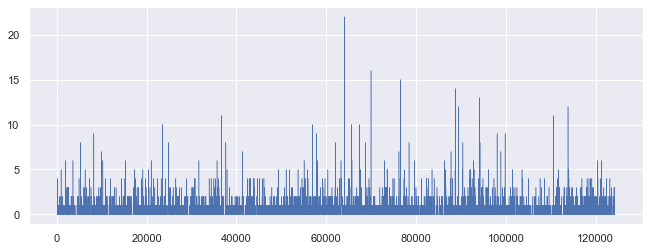

In [16]:
sns.set(rc={'figure.figsize':(11, 4)})
prgcontct['prgcontct_meeting_group_of_people_piv'].plot(linewidth=0.5)

In [91]:
pivotType = ["_piv", "_sum_n_days", "_avg_n_days", "_piv_days_since"]
pivot_dict = {}
#prgcontct
for tp in pivotType:
    pivot_dict[tp] = prgcontct.filter(regex=r'{}$'.format(tp), axis=1)

14


Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

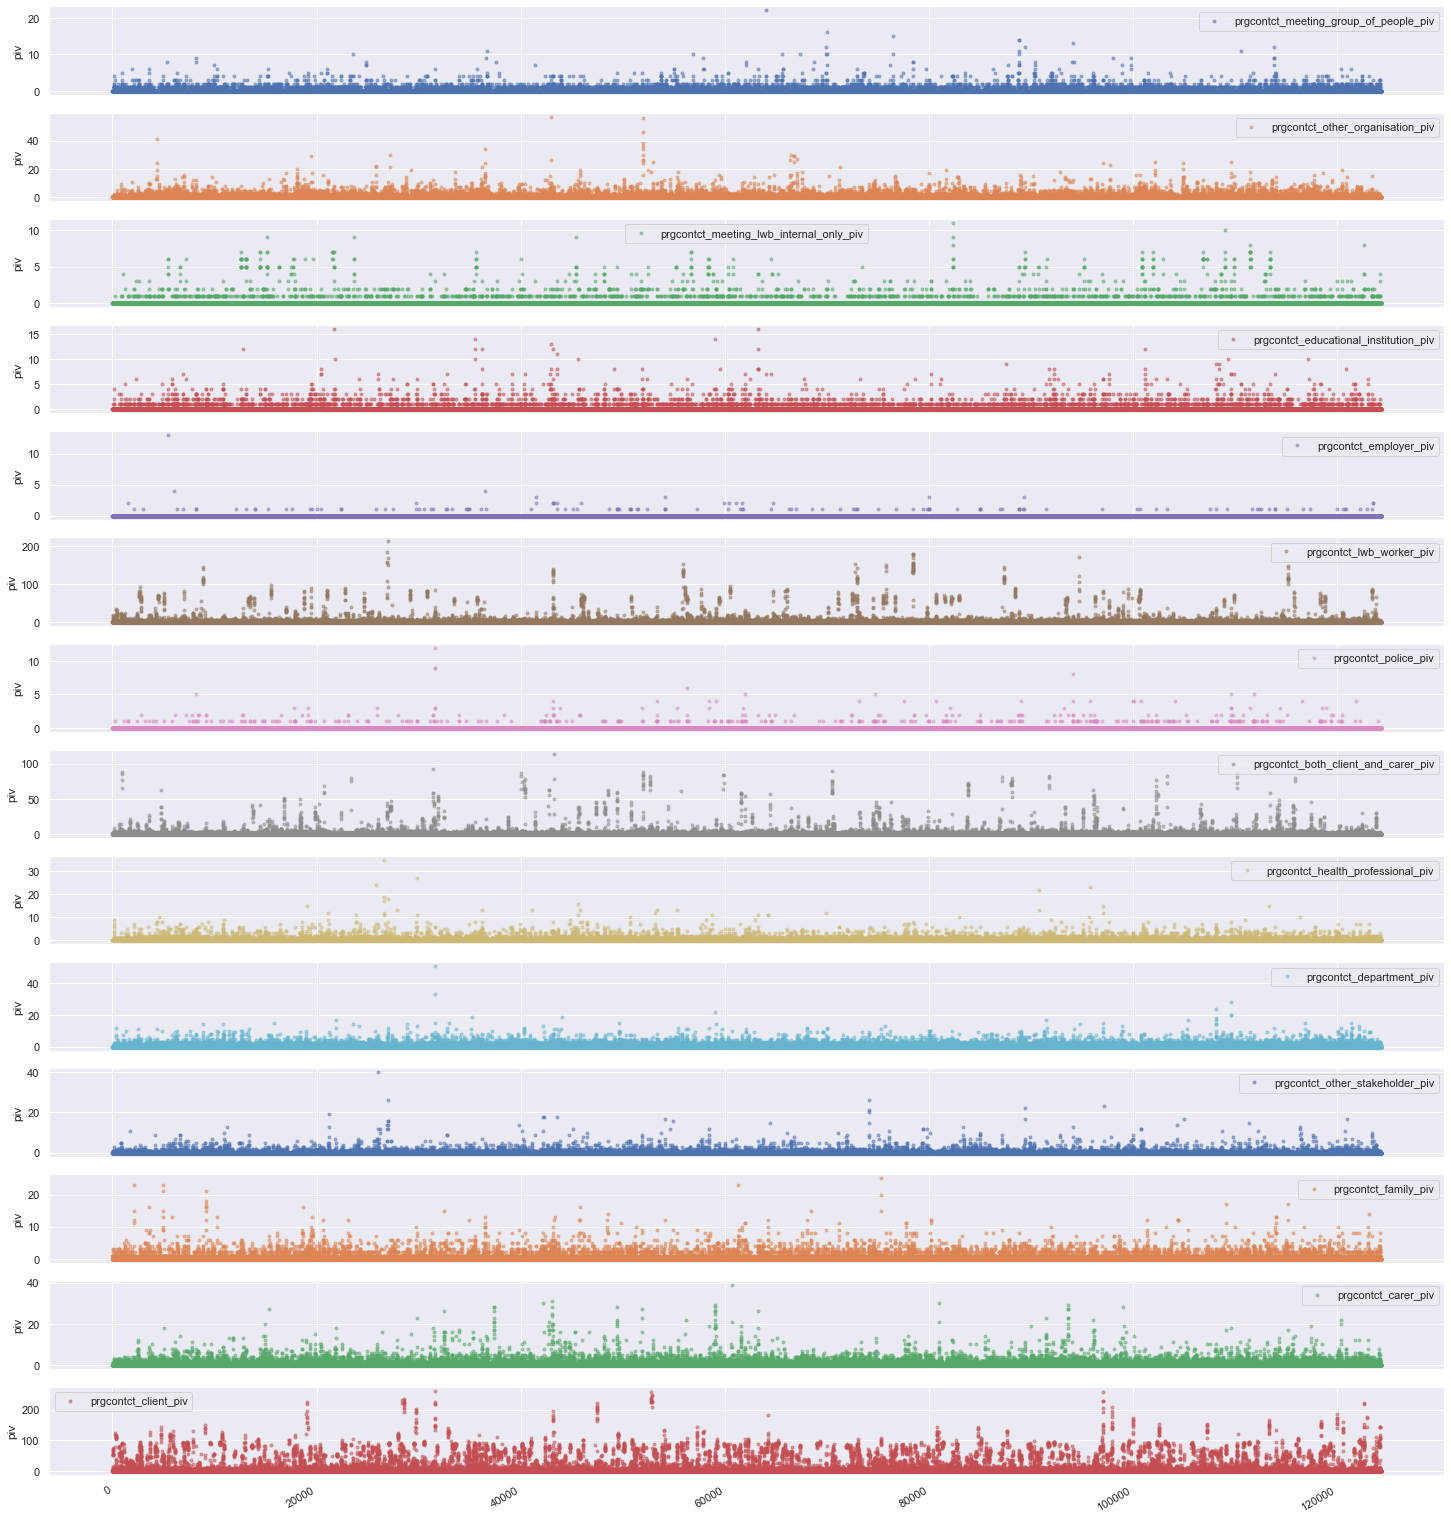

In [94]:
cols_plot = pivot_dict["_piv"].columns
axes = pivot_dict["_piv"].plot(marker='.', alpha=0.5, linestyle='None', figsize=(25, 30), subplots=True)
for ax in axes:
    ax.set_ylabel('piv')
plt.savefig('foo.png')

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

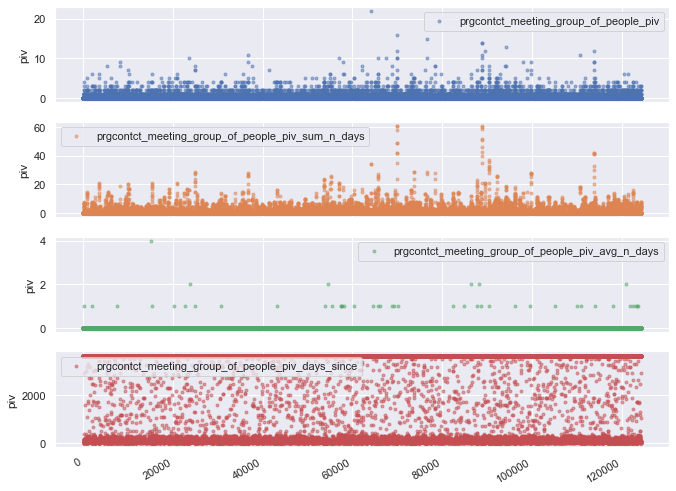

In [95]:
## see what's the differences if same event but different pivot type
mgop = prgcontct.filter(like='meeting_group_of_people')
cols_plot = mgop.columns
axes = mgop.plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('piv')

plt.savefig('piv.png')

Text(0, 0.5, '_sum_n_days')

Text(0, 0.5, '_sum_n_days')

Text(0, 0.5, '_sum_n_days')

Text(0, 0.5, '_sum_n_days')

Text(0, 0.5, '_sum_n_days')

Text(0, 0.5, '_sum_n_days')

Text(0, 0.5, '_sum_n_days')

Text(0, 0.5, '_sum_n_days')

Text(0, 0.5, '_sum_n_days')

Text(0, 0.5, '_sum_n_days')

Text(0, 0.5, '_sum_n_days')

Text(0, 0.5, '_sum_n_days')

Text(0, 0.5, '_sum_n_days')

Text(0, 0.5, '_sum_n_days')

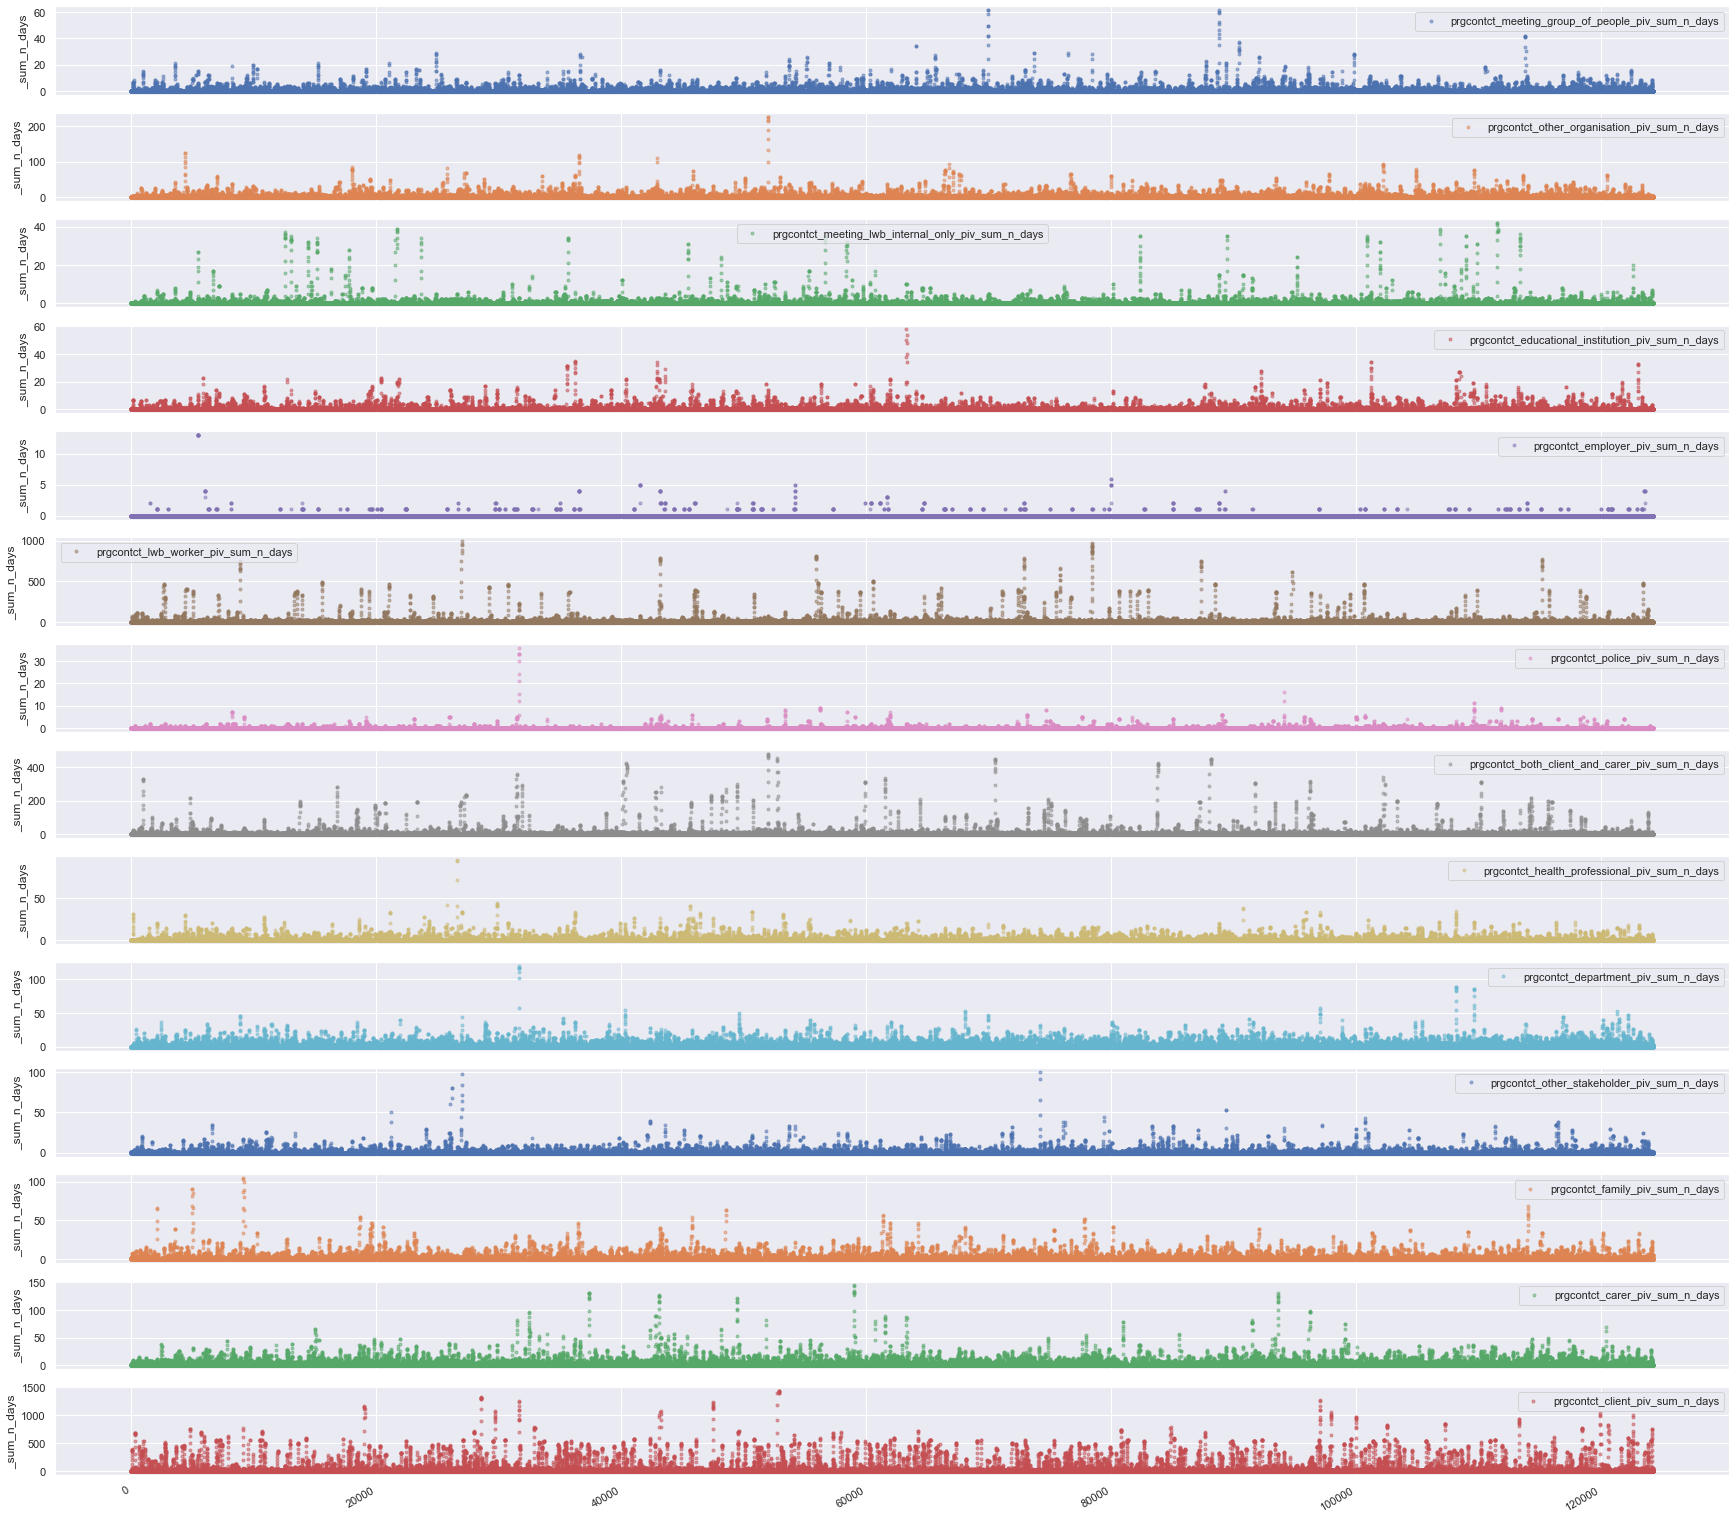

In [20]:
cols_plot = pivot_dict["_sum_n_days"].columns
axes = pivot_dict["_sum_n_days"].plot(marker='.', alpha=0.5, linestyle='None', figsize=(30, 30), subplots=True)
for ax in axes:
    ax.set_ylabel("_sum_n_days")


In [29]:
import matplotlib.dates as mdates

""" tryData = data.loc["0000D172-EA88-432F-8235-9FAA00D29072"]
tryData = tryData.filter(regex=r'^prgcontct_', axis=1)
tryData = tryData.filter(regex=r'_piv$', axis=1)

fig, ax = plt.subplots()
for nm in tryData.columns:
    ax.plot(tryData[nm], label=nm)
    # Set x-ticks to yearly interval, adjust y-axis limits, add legend and labels
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.set_ylim(0, 3)
    ax.legend()
    #ax.set_ylabel('Production (GWh)')
    #ax.set_title('Trends in Electricity Production (365-d Rolling Means)');"""

' tryData = data.loc["0000D172-EA88-432F-8235-9FAA00D29072"]\ntryData = tryData.filter(regex=r\'^prgcontct_\', axis=1)\ntryData = tryData.filter(regex=r\'_piv$\', axis=1)\n\nfig, ax = plt.subplots()\nfor nm in tryData.columns:\n    ax.plot(tryData[nm], label=nm)\n    # Set x-ticks to yearly interval, adjust y-axis limits, add legend and labels\n    ax.xaxis.set_major_locator(mdates.MonthLocator())\n    ax.set_ylim(0, 3)\n    ax.legend()\n    #ax.set_ylabel(\'Production (GWh)\')\n    #ax.set_title(\'Trends in Electricity Production (365-d Rolling Means)\');'

Now, let plot each client's progress contact type. We picked 10 clients. 

<Figure size 1440x216 with 0 Axes>

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

(0.0, 3.0)

<Figure size 1440x216 with 0 Axes>

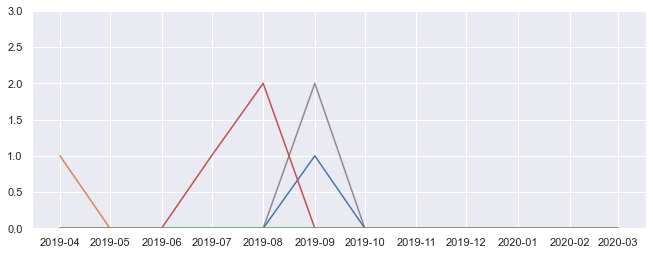

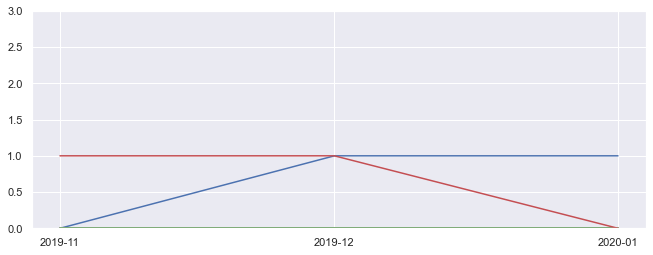

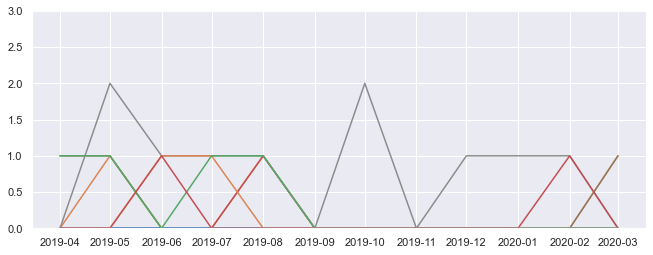

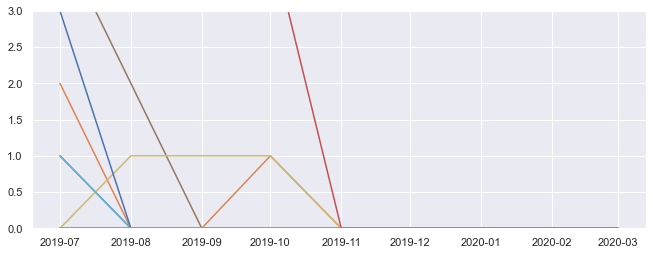

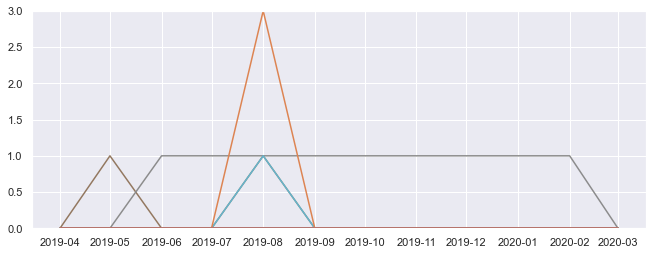

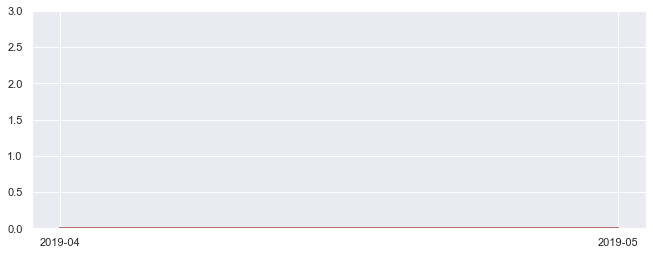

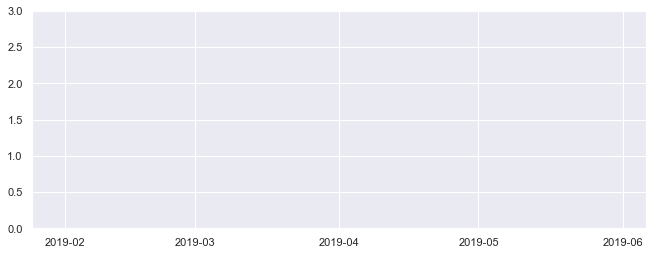

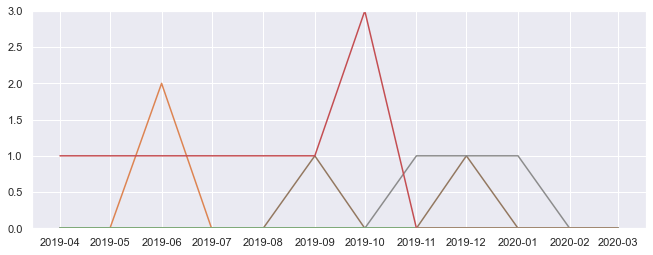

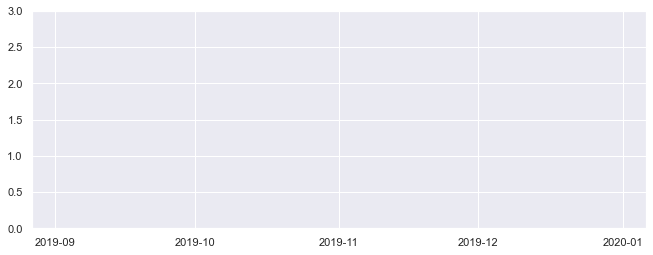

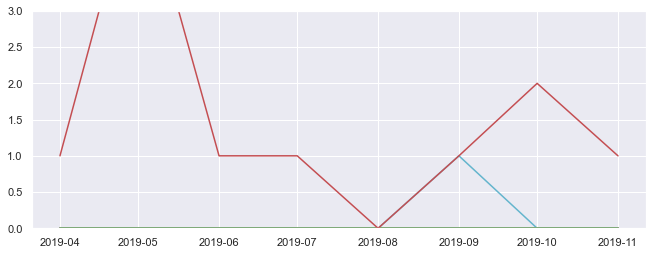

In [22]:
prgc_piv = data.filter(regex=r'^prgcontct_', axis=1)
prgc_piv = prgc_piv.filter(regex=r'_piv$', axis=1)
prgc_piv = prgc_piv.sort_index(level=0)
uniqClient = prgc_piv.index.get_level_values(0).unique()
tryData = prgc_piv.loc[uniqClient[0] : uniqClient[6]]

figure(figsize=(20,3))
for clientID in uniqClient[:10]: 
    tryData = prgc_piv.loc[clientID]
    fig, ax = plt.subplots()
    for nm in tryData.columns:
        ax.plot(tryData[nm], label=nm)
        # Set x-ticks to yearly interval, adjust y-axis limits, add legend and labels
        ax.xaxis.set_major_locator(mdates.MonthLocator())
        ax.set_ylim(0, 3)
        #ax.legend()

Each client have really diffrent patterns, now lets summing each type to see if could find which type occurs more frequently. 

(0.0, 50000.0)

(0.0, 50000.0)

(0.0, 50000.0)

(0.0, 50000.0)

(0.0, 50000.0)

(0.0, 50000.0)

(0.0, 50000.0)

(0.0, 50000.0)

(0.0, 50000.0)

(0.0, 50000.0)

(0.0, 50000.0)

(0.0, 50000.0)

(0.0, 50000.0)

(0.0, 50000.0)

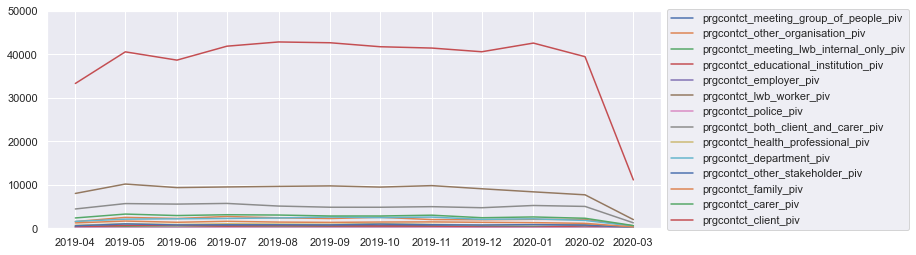

In [96]:
tryData = prgc_piv.sum(level=1)
fig, ax = plt.subplots()
for nm in tryData.columns:
    #colormap = plt.cm.nipy_spectral #I suggest to use nipy_spectral, Set1,Paired
    #ax.set_prop_cycle([colormap(i) for i in np.linspace(0, 1, 14)])
    ax.plot(tryData[nm], label=nm)
    # Set x-ticks to yearly interval, adjust y-axis limits, add legend and labels
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.set_ylim(0, 50000)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('prgcontctSummation.png')

The prgcontct_client_piv has so much more larger value than others. Therefore we droped it for observing other types. 

(0.0, 1.0)

(0.0, 1.0)

(0.0, 1.0)

(0.0, 1.0)

(0.0, 1.0)

(0.0, 1.0)

(0.0, 1.0)

(0.0, 1.0)

(0.0, 1.0)

(0.0, 1.0)

(0.0, 1.0)

(0.0, 1.0)

(0.0, 1.0)

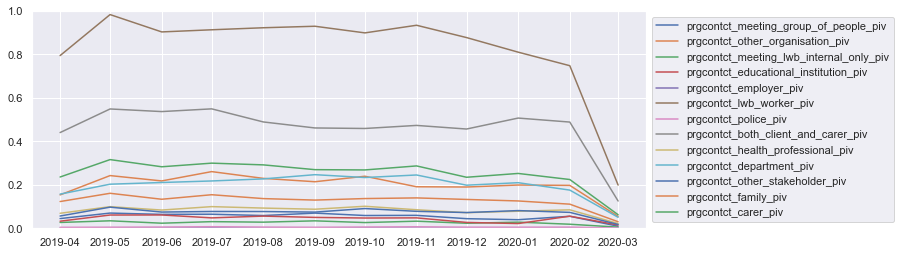

In [24]:
tryData = prgc_piv.mean(level=1)
tryData = tryData.drop(columns = ["prgcontct_client_piv"])
fig, ax = plt.subplots()
for nm in tryData.columns:
    #colormap = plt.cm.nipy_spectral #I suggest to use nipy_spectral, Set1,Paired
    #ax.set_prop_cycle([colormap(i) for i in np.linspace(0, 1, 14)])
    ax.plot(tryData[nm], label=nm)
    # Set x-ticks to yearly interval, adjust y-axis limits, add legend and labels
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.set_ylim(0, 1)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('prgcontct_.png')

In [25]:
tryData

,prgcontct_meeting_group_of_people_piv,prgcontct_other_organisation_piv,prgcontct_meeting_lwb_internal_only_piv,prgcontct_educational_institution_piv,prgcontct_employer_piv,prgcontct_lwb_worker_piv,prgcontct_police_piv,prgcontct_both_client_and_carer_piv,prgcontct_health_professional_piv,prgcontct_department_piv,prgcontct_other_stakeholder_piv,prgcontct_family_piv,prgcontct_carer_piv
_key_occurreddate_month,,,,,,,,,,,,,
2019-04-01,0.044684,0.153572,0.026850,0.032696,0.001189,0.794313,0.004558,0.440305,0.069058,0.157139,0.056475,0.123056,0.235906
2019-05-01,0.070028,0.242442,0.034483,0.061045,0.002705,0.982904,0.005023,0.548826,0.099488,0.202840,0.097266,0.161016,0.315947
2019-06-01,0.064062,0.217849,0.023444,0.061264,0.001544,0.903136,0.005789,0.536807,0.083936,0.210613,0.074674,0.133623,0.282972
2019-07-01,0.064727,0.260732,0.030635,0.047921,0.001921,0.912993,0.007395,0.549313,0.099683,0.217709,0.077403,0.154422,0.299625
2019-08-01,0.058643,0.229599,0.028222,0.056060,0.001148,0.922319,0.005644,0.489142,0.092988,0.227208,0.077107,0.136611,0.291687
2019-09-01,0.069925,0.214156,0.034296,0.050110,0.002572,0.929218,0.004763,0.461465,0.087739,0.246642,0.074497,0.129751,0.269696
2019-10-01,0.058807,0.239401,0.026368,0.047235,0.002087,0.898701,0.005881,0.459072,0.101299,0.233520,0.090771,0.136773,0.268425
2019-11-01,0.059562,0.191056,0.032731,0.047954,0.000761,0.933777,0.007041,0.473168,0.085347,0.245195,0.078021,0.139772,0.286870
2019-12-01,0.044284,0.189870,0.023251,0.027014,0.001061,0.877183,0.005210,0.456536,0.071877,0.198263,0.072455,0.132754,0.234732


<b>(2). Visualize progress note data<b/>

In [98]:
progsubjcat = cleanedData.filter(regex=r'^progsubjcat_', axis=1)

In [99]:
pivotType = ["_piv", "_sum_n_days", "_avg_n_days", "_piv_days_since"]
pivot_dict = {}
#prgcontct
for tp in pivotType:
    pivot_dict[tp] = progsubjcat.filter(regex=r'{}$'.format(tp), axis=1)
    

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

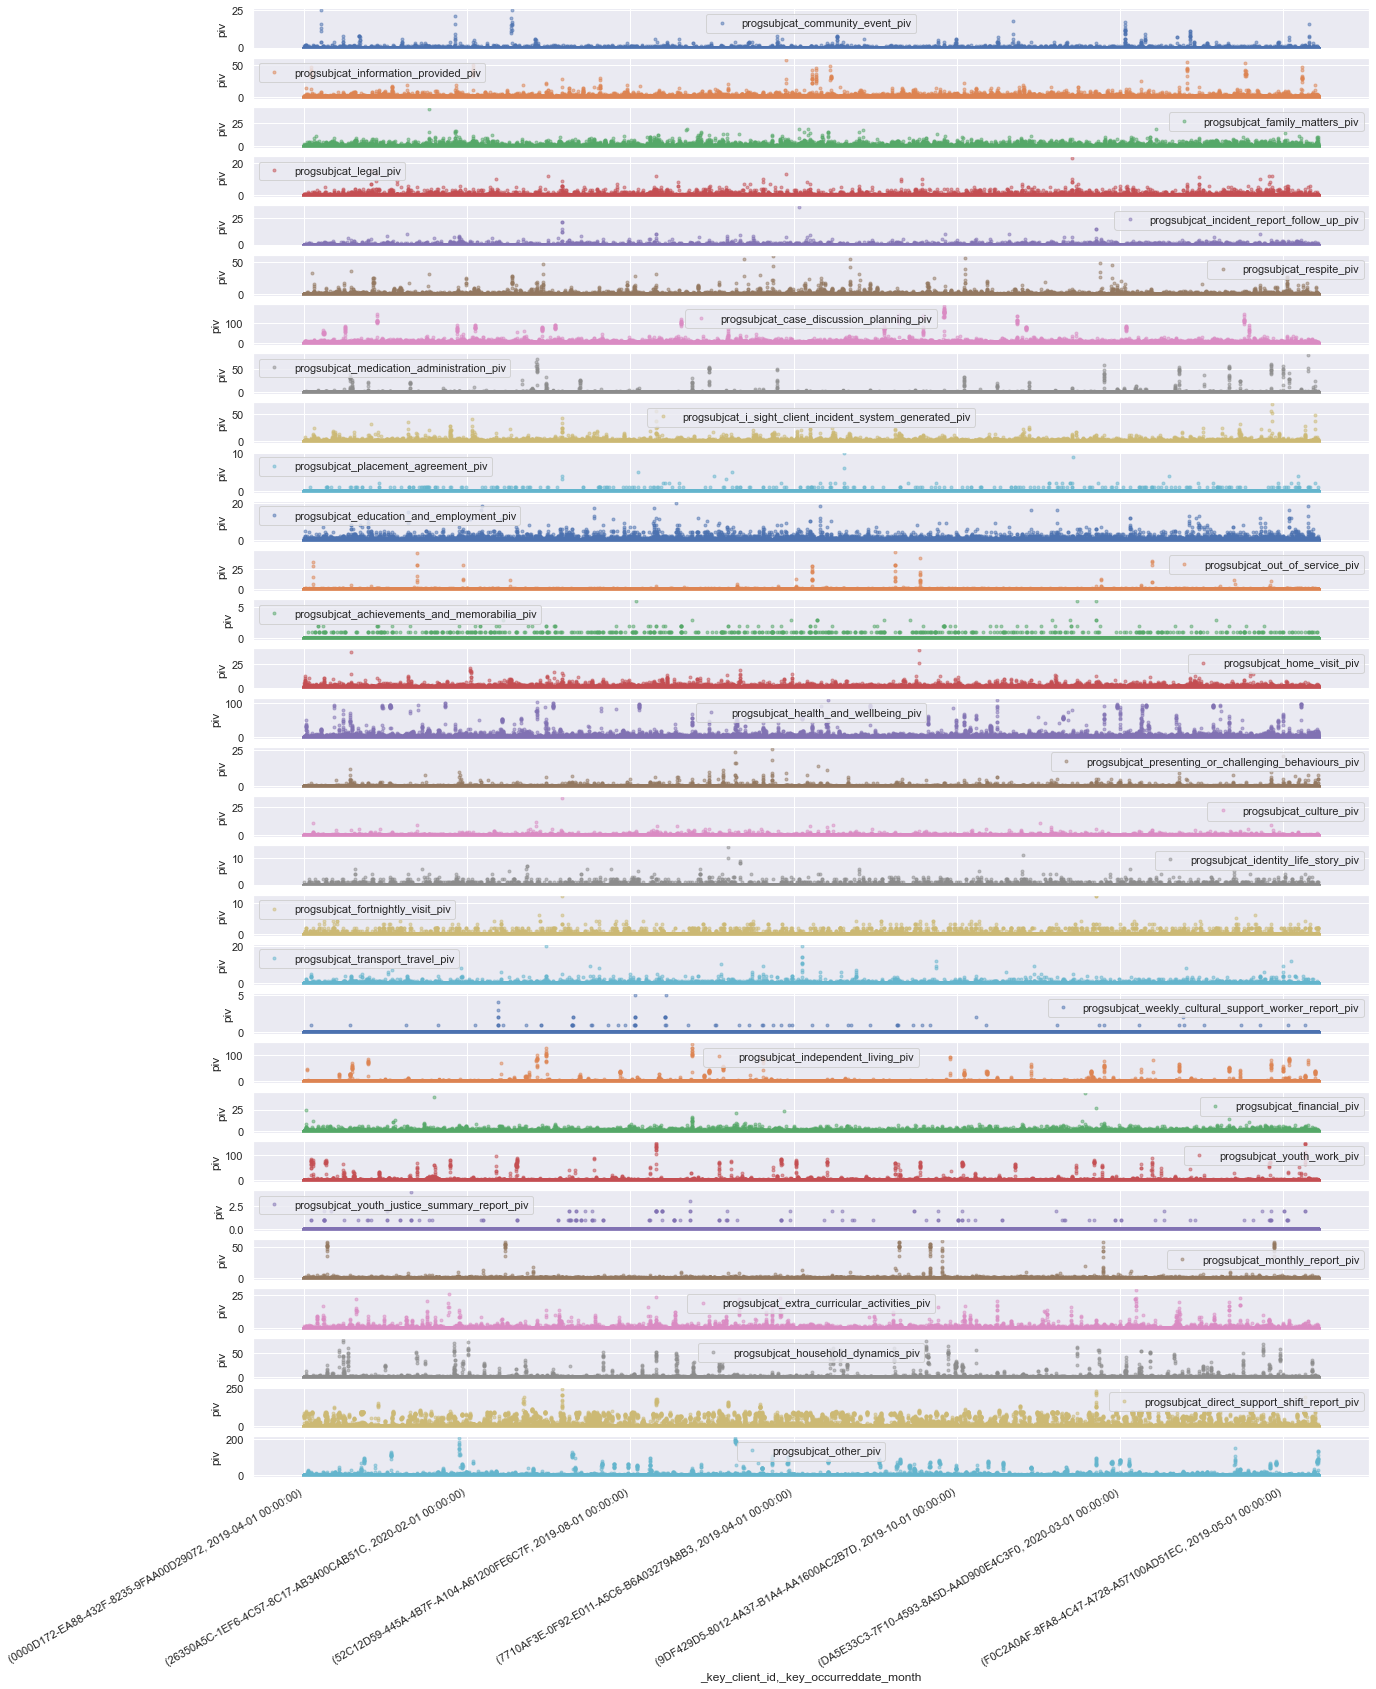

In [102]:
cols_plot = pivot_dict["_piv"].columns
axes = pivot_dict["_piv"].plot(marker='.', alpha=0.5, linestyle='None', figsize=(20, 30), subplots=True)
for ax in axes:
    ax.set_ylabel('piv')
plt.savefig('progsubject_.png')

In [103]:
pivot_dict["_piv"]

progsubjcat_community_event_piv  \
_key_client_id                       _key_occurreddate_month                                    
0000D172-EA88-432F-8235-9FAA00D29072 2019-04-01                                             0   
                                     2019-05-01                                             0   
                                     2019-06-01                                             0   
                                     2019-07-01                                             0   
                                     2019-08-01                                             0   
...                                                                                       ...   
FFFF7C4D-F6DD-46D0-A9C0-AE3C2DC51132 2019-09-01                                             0   
                                     2019-10-01                                             0   
                                     2019-11-01                                             0   
                                     2019-12-01                                             0   
                                     2020-01-01                                             0   

                                                              progsubjcat_information_provided_piv  \
_key_client_id                       _key_occurreddate_month                                         
0000D172-EA88-432F-8235-9FAA00D29072 2019-04-01                                                  0   
                                     2019-05-01                                                  0   
                                     2019-06-01                                                  0   
                                     2019-07-01                                                  0   
                                     2019-08-01                                                  0   
...                                                                                            ...   
FFFF7C4D-F6DD-46D0-A9C0-AE3C2DC51132 2019-09-01                                                  0   
                                     2019-10-01                                                  0   
                                     2019-11-01                                                  0   
                                     2019-12-01                                                  0   
                                     2020-01-01                                                  0   

                                                              progsubjcat_family_matters_piv  \
_key_client_id                       _key_occurreddate_month                                   
0000D172-EA88-432F-8235-9FAA00D29072 2019-04-01                                            0   
                                     2019-05-01                                            0   
                                     2019-06-01                                            0   
                                     2019-07-01                                            0   
                                     2019-08-01                                            0   
...                                                                                      ...   
FFFF7C4D-F6DD-46D0-A9C0-AE3C2DC51132 2019-09-01                                            0   
                                     2019-10-01                                            0   
                                     2019-11-01                                            0   
                                     2019-12-01                                            0   
                                     2020-01-01                                            0   

                                                              progsubjcat_legal_piv  \
_key_client_id                       _key_occurreddate_month                          
0000D172-EA88-432F-8235-9FAA00D29072 2019-04-01   

In [104]:
progsubPivSum

,progsubjcat_community_event_piv,progsubjcat_information_provided_piv,progsubjcat_family_matters_piv,progsubjcat_legal_piv,progsubjcat_incident_report_follow_up_piv,progsubjcat_respite_piv,progsubjcat_case_discussion_planning_piv,progsubjcat_medication_administration_piv,progsubjcat_i_sight_client_incident_system_generated_piv,progsubjcat_placement_agreement_piv,...,progsubjcat_weekly_cultural_support_worker_report_piv,progsubjcat_independent_living_piv,progsubjcat_financial_piv,progsubjcat_youth_work_piv,progsubjcat_youth_justice_summary_report_piv,progsubjcat_monthly_report_piv,progsubjcat_extra_curricular_activities_piv,progsubjcat_household_dynamics_piv,progsubjcat_direct_support_shift_report_piv,progsubjcat_other_piv
_key_occurreddate_month,,,,,,,,,,,,,,,,,,,,,
2019-04-01,146,1496,853,246,151,564,8757,503,1724,18,...,9,1563,430,1838,19,1264,347,1553,20173,4931
2019-05-01,173,2159,979,423,165,918,12046,571,2411,25,...,2,1692,661,2345,24,1485,478,1690,24107,6156
2019-06-01,198,1885,892,367,161,806,11039,538,2031,21,...,5,1621,582,2024,26,1166,456,1788,23989,5806
2019-07-01,235,2211,1089,485,164,977,12151,697,2137,29,...,8,1729,521,2056,13,1321,643,1603,24882,6468
2019-08-01,216,1990,1061,493,123,812,11686,691,2279,56,...,8,1708,588,2281,16,1506,594,1620,25806,6090
2019-09-01,141,3372,926,611,171,733,11655,678,2120,25,...,11,1595,718,2115,16,1610,518,1759,25237,5538
2019-10-01,202,1770,993,514,195,752,12104,671,2162,37,...,11,1648,658,2377,17,1283,492,1434,26017,5535
2019-11-01,203,1787,1054,580,127,704,11100,665,1781,37,...,10,1736,595,2414,29,1320,439,1147,27311,5821
2019-12-01,254,1669,1146,377,178,460,10075,700,1599,33,...,8,1766,577,2245,14,1106,465,1096,27269,4999


(0.0, 30000.0)

(0.0, 30000.0)

(0.0, 30000.0)

(0.0, 30000.0)

(0.0, 30000.0)

(0.0, 30000.0)

(0.0, 30000.0)

(0.0, 30000.0)

(0.0, 30000.0)

(0.0, 30000.0)

(0.0, 30000.0)

(0.0, 30000.0)

(0.0, 30000.0)

(0.0, 30000.0)

(0.0, 30000.0)

(0.0, 30000.0)

(0.0, 30000.0)

(0.0, 30000.0)

(0.0, 30000.0)

(0.0, 30000.0)

(0.0, 30000.0)

(0.0, 30000.0)

(0.0, 30000.0)

(0.0, 30000.0)

(0.0, 30000.0)

(0.0, 30000.0)

(0.0, 30000.0)

(0.0, 30000.0)

(0.0, 30000.0)

(0.0, 30000.0)

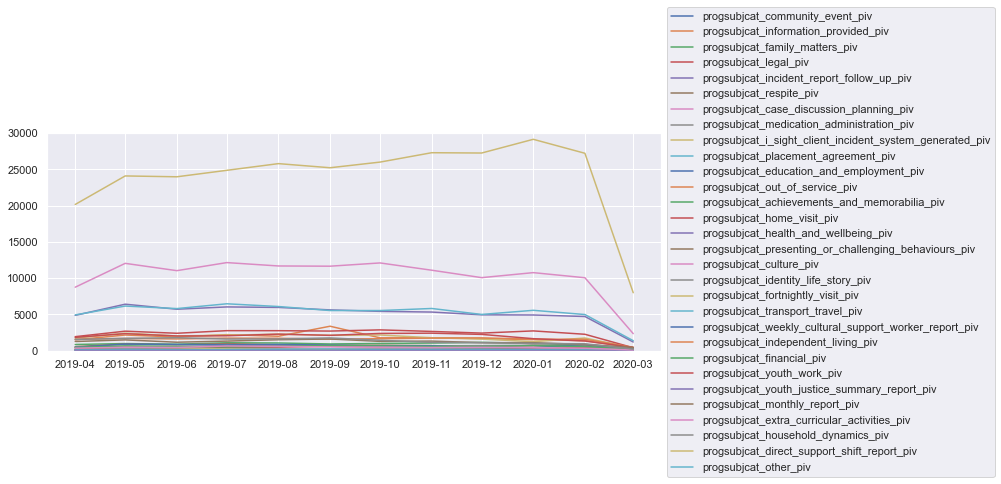

In [105]:
progsubPivSum = pivot_dict["_piv"].sum(level=1)
fig, ax = plt.subplots()
for nm in progsubPivSum.columns:
    #colormap = plt.cm.nipy_spectral #I suggest to use nipy_spectral, Set1,Paired
    #ax.set_prop_cycle([colormap(i) for i in np.linspace(0, 1, 14)])
    ax.plot(progsubPivSum[nm], label=nm)
    # Set x-ticks to yearly interval, adjust y-axis limits, add legend and labels
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.set_ylim(0, 30000)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('progsubjectSummation.png')

<b>(3). Visualize Client Status data<b/>

Text(0, 0.5, 'piv')

Text(0, 0.5, 'piv')

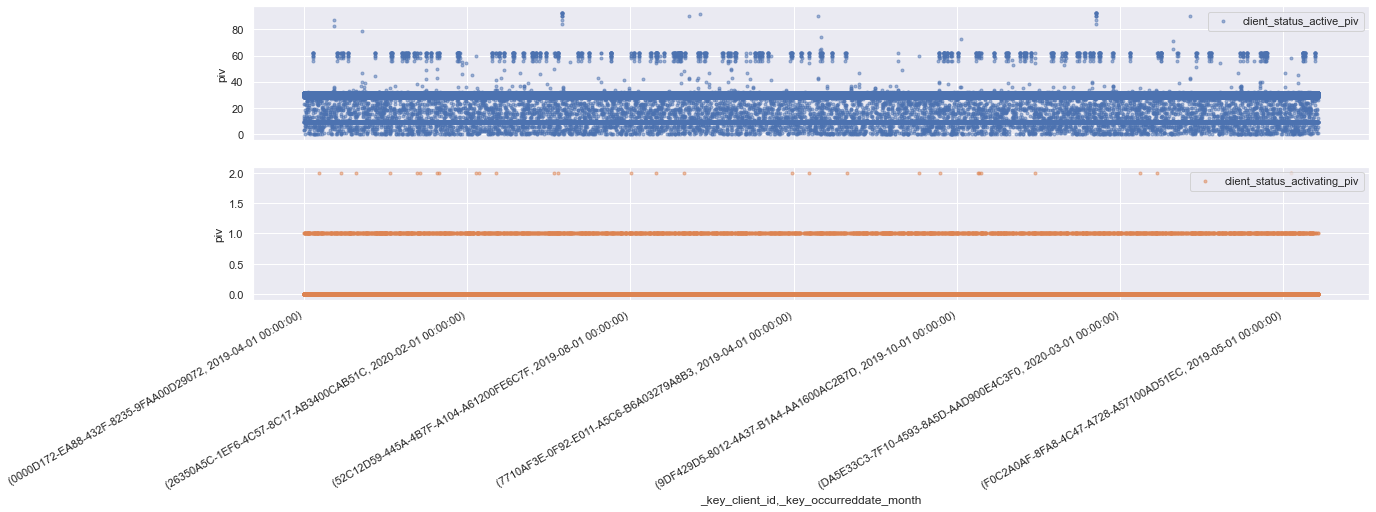

In [45]:
client_status = cleanedData.filter(regex=r'^client_', axis=1)
cols_plot = client_status.columns
axes = client_status.plot(marker='.', alpha=0.5, linestyle='None', figsize=(20, 6), subplots=True)
for ax in axes:
    ax.set_ylabel('piv')

Why client_status_activating column has value 2?  <br/>
What does the number in client_status_active_piv means? Is it means how many services the client received in that date?  

In [ ]:
print(len(pivot_dict["_piv"].columns[:15]))
seg1 = pivot_dict["_piv"][pivot_dict["_piv"].columns[:15]]
seg2 = pivot_dict["_piv"][pivot_dict["_piv"].columns[15:]]